# Exercise Set 1
<h2> IN4080 - 2024 </h2>

*You will probably not manage to work through all of this exercise set during the group session. Continue
to work on it by yourself after the group session and return to the teacher in later group sessions if you
have any questions.*


This exercises requires the following packages:
* Spacy 
* Numpy 
* Pandas
* Matplotlib

## Part 0: Get help to set up a working environment on your PC

Follow the installation instructions on the course web page to set up a working environment on your
own computer. Alternatively, you can also work on the IFI cluster, where everything should be ready.
The following exercises should be solved interactively in Python. We recommend using a Jupyter
Notebook, but you can also work in a standard interactive Python prompt.

## Part 1: Precpocessing Data with SpaCy

We will work with the book *Peter Pan*, which is available as plain text on Project Gutenberg. 


a) Download the Plain Text UTF-8 file from https://www.gutenberg.org/ebooks/16 and place it in your working
directory. Rename the file if necessary. Open the file in a text editor. Are there any particularities in the document 
that you’ll need to watch out when processing?


**Answer**

There is a Gutenberg Project header (and footer), that are not a part of the original text.


b) This is a Jupyter notebook which is organized into cells. There are essentially two types of cells: text (Markdown)
cells and code cells. You can execute a code cell by clicking on the Play button or by pressing Ctrl+Enter.
Create a code cell below, load in the Peter Pan text, and print the length of the text. What does this number tell you?

<details>
  <summary>Code Solution</summary>

```python
with open(‘peterpan.txt’, ‘r’, encoding=’utf-8-sig’) as f:
  text = f.read()
  print(len(text))
```
</details> 

In [3]:
filepath = '/home/vlhandfo/in4080/gl/seminar1/peter-pan.txt'
with open(filepath, 'r', encoding='utf-8-sig') as f:
	raw_text = f.read()
	print(len(raw_text))

274155


**Answer**

The result shows the number of characters in the text file. 

c) We would now like preprocess the raw text. The NLP pipeline from `SpaCy` does a lot of the heavy lifting for us.
Run the text through the SpaCy pipeline and print out the number of sentences in the resulting `Doc` object.
Does the number of sentences correspond to your expectations? Inspect the data.

[SpaCy Usage Documentation](https://spacy.io/usage)

Installation:
```bash
pip install -U pip setuptools wheel
pip install -U spacy
python -m spacy download en_core_web_sm
```

In [1]:
import spacy

In [4]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(raw_text)
assert doc.has_annotation("SENT_START")

In [5]:
print("Number of Sentences:", len([*doc.sents]))

Number of Sentences: 3016


In [27]:
# Look at the first 5 sentences in the document
print(*[*doc.sents][250:255], sep="\n===\n")

Mrs. Darling left the room to
get a chocolate for him, and Mr. Darling thought this showed want of
firmness.


===
“Mother, don’t pamper him,” he called after her.
===
“Michael, when I was
your age I took medicine without a murmur.
===
I said, ‘Thank you, kind
parents, for giving me bottles to make me well.’”

He really thought this was true, and Wendy, who was now in her
night-gown, believed it also, and she said, to encourage Michael, “That
medicine you sometimes take, father, is much nastier, isn’t it?”

“Ever so much nastier,” Mr. Darling said bravely, “and I would take it
now as an example to you, Michael, if I hadn’t lost the bottle.”


===
He had not exactly lost it; he had climbed in the dead of night to the
top of the wardrobe and hidden it there.


d) It turns out that the initial text contains a lot of line breaks that make the processing harder than
necessary. Replace all line breaks in the raw text with a space.  

*Hint* use regular expressions and the `re` library.

If you are not familiar with regular expressions, let your teachers know. We won’t need them now, but they 
can come quite handy for a lot of text processing tasks, so it’s worth investing some time in learning the basics…

In [17]:
import re

text_without_line_breaks = re.sub(r'\n+', ' ', raw_text)

e) Run the new text through the sentence tokenizer again. How do you judge the result? Have new errors been introduced?

In [18]:
nlp2 = spacy.load("en_core_web_sm")
doc2 = nlp(text_without_line_breaks)
assert doc2.has_annotation("SENT_START")

In [19]:
print("Number of Sentences:", len([*doc2.sents]))

Number of Sentences: 3315


In [26]:
print(*[*doc2.sents][250:255], sep="\n===\n")

Of course Mrs. Darling brushed him, but he began to talk again about its being a mistake to have a dog for a nurse.
===
“George, Nana is a treasure.”
===
“No doubt, but I have an uneasy feeling at times that she looks upon the children as puppies.”
===
“Oh no, dear one, I feel sure she knows they have souls.”
===
“I wonder,” Mr. Darling said thoughtfully, “I wonder.”


## Part 2: Frequency distributions and Pandas

In this exercise set, we want to study the frequency distributions of words in the text.
Python provides a Counter class that counts repeated elements in a list and stores the counts as a
dictionary. We can set up the counter, get the most common elements, and the count for a specific element as follows:

```python
import collections

c = collections.Counter(tokens)
print(c.most_common(10))
print(c['with'])
```

a) Print out the 10 most frequent tokens in the text.


In [43]:
from collections import Counter

tokens = [token.text for token in doc2]

c = Counter(tokens)

print("Most Common:")
print(*c.most_common(10), sep="\n")

Most Common:
(',', 3976)
('.', 2789)
('the', 2324)
('”', 1463)
('“', 1462)
('and', 1421)
('to', 1242)
('a', 960)
('was', 932)
('of', 919)


b) You will see that punctuation marks are among the most frequent items in the result. Remove them from the counter.

<details>
<summary> Hints </summary>
	<ul>
		<li> <code>string.punctuation</code> contains a list of punctuation symbols (you’ll need to import string first)</li>
		<li>You can delete the 'and' item from the counter with <code>del c[‘and’]</code>.</li>
	</ul>
</details>


In [48]:
from string import punctuation

for punct in punctuation:
    del c[punct]

print("Most Common:")
print(*c.most_common(10), sep="\n")

Most Common:
('the', 2324)
('and', 1421)
('to', 1242)
('a', 960)
('was', 932)
('of', 919)
('he', 879)
('in', 697)
('it', 662)
('that', 609)


**NOTE** Not all punctuation marks were removed! The list of punctuation doesn't include every symbol.

In [49]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [50]:
del c["“"]
del c["”"]

print("Most Common:")
print(*c.most_common(10), sep="\n")

Most Common:
('the', 2324)
('and', 1421)
('to', 1242)
('a', 960)
('was', 932)
('of', 919)
('he', 879)
('in', 697)
('it', 662)
('that', 609)


c) It would be nice if we could display the frequency distribution as a nicely formatted table. Let us use a
DataFrame from the Pandas package for this. In general, it is easy to populate a DataFrame with the
contents of a Python dictionary, as in the following code snippet:

```python
import pandas as pd

d = {‘apple’: 5, ‘orange’: 8, ‘banana’: 51, ‘strawberry’: 20}
df = pd.DataFrame(d.items(), columns=['fruit', 'number'])

df.head()    # Display the first rows
```

You can do the same with your word counter.  

How many types and how many tokens does the text contain? What is its type-token-ratio?


In [64]:
import pandas as pd

df = pd.DataFrame(c.items(), columns=["Word", "Count"]).sort_values("Count", ascending=False)
display(df.head())


,Word,Count
29,the,2324
123,and,1421
142,to,1242
23,a,960
25,was,932


In [62]:
print("Number of tokens:", len(tokens))
# OR
print("Number of tokens:", len(doc2))

print()

print("Number of types:", len(df))
# OR
print("Number of types:", len(doc2.vocab)) # Note that this is a different number. Why?


print()

n_tokens = len(tokens)
n_types = len(df)

TTR = n_types / n_tokens
print("Type-token ration:", TTR)

Number of tokens: 62328
Number of tokens: 62328

Number of types: 5749
Number of types: 6411

Type-token ration: 0.09223783853163907


d) With Pandas, you can easily select rows of a dataframe according to a particular criterion. For example,
this command displays all words that occur ten times or more:

```python
df[df[‘count’] >= 10]
```

How many hapaxes are in the dataset? What percentage of all word types are hapaxes?
How many word types start with upper case A?

In [66]:
n_hapax = len(df[df["Count"] == 1])
print("Number of hapaxes:", n_hapax)

print(f"Percentage of types that are hapax: {n_hapax / len(df):.4f}")


Number of hapaxes: 2852
Count of words that are hapax: 0.4961


In [67]:

startswith_A = df[df["Word"].apply(
    			lambda x : True if x.startswith("A") else False
      		)]
print(f"Number of word types that start with 'A': {len(startswith_A)}")


Number of word types that start with 'A': 49


## Part 3: Plotting with Matplotlib

Matplotlib is a package for making plots and figures in Python. When using Jupyter notebooks, the plots
are directly displayed in the notebook. This code snippet generates a simple plot:

```python 
import numpy as np
import matplotlib.pyplot as plt

numbers = np.arange(10)
print(numbers)
plt.plot(numbers)
```

a) Let us create a plot from our frequency distribution. You can directly use the `plot()` method of the
dataframe as follows:

```python
df = df.sort_values('count', ascending=False)
df.plot(x='word', y='count')
```

Does the result of this plot correspond to your expectations? 

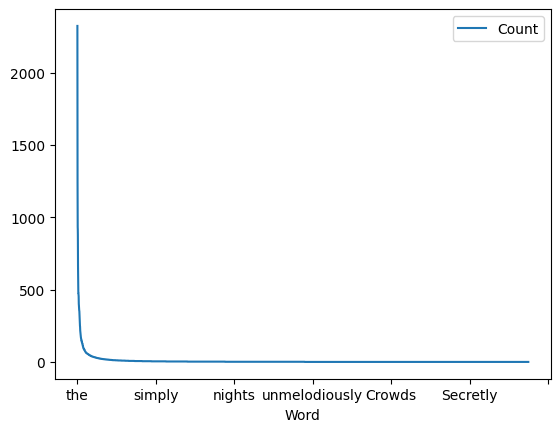

In [70]:
import numpy as np
import matplotlib.pyplot as plt

df = df.sort_values('Count', ascending=False)
df.plot(x='Word', y='Count')

plt.show()

b) Let's make some more visualizations. 

* Modify the command to only display the 20 most frequent words. 
* Try to display all words on the x-axis.
* For frequency plots, it is more natural to use bar charts. Switch the type of the plot with the `kind='bar'` parameter.

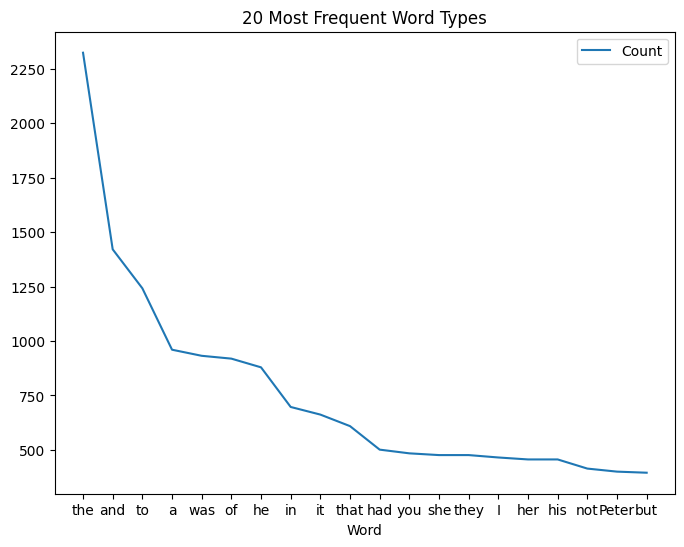

In [84]:
X = 20
df.iloc[:X].plot(x="Word", y="Count", figsize=(8,6))
words = list(df.iloc[:X]["Word"])
plt.title(f"{X} Most Frequent Word Types")
plt.xticks(np.arange(X), words)
plt.show()

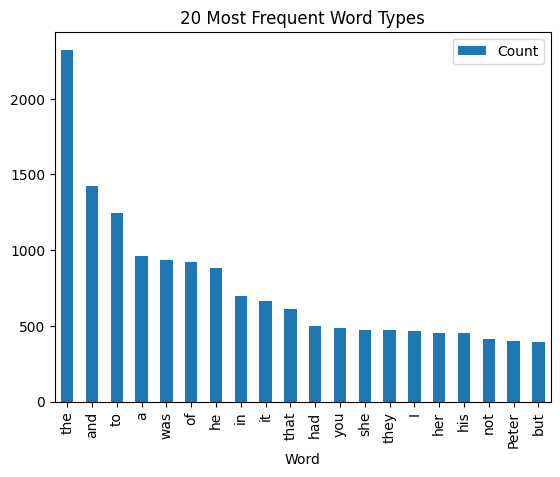

In [86]:
df.iloc[:X].plot(x="Word", y="Count", 
                 kind="bar")
words = list(df.iloc[:X]["Word"])
plt.title(f"{X} Most Frequent Word Types")
plt.show()

c) Zipf’s law states that the product of the frequency of a word and of its rank is approximately constant.
Let us verify this law on a subset of our frequency distribution. Select the 2000 first words of the
sorted frequency table. Reset the indices in the resulting dataframe so that we can use each index for the rank. Now, add a new column with the product of rank and frequency.

<details>
<summary>Hints</summary>

```python
	df_zipf = df[:2000].reset_index(drop=True) 
	df_zipf['z'] = df_zipf.index.values * df_zipf['Count']
```
</details>

What are the highest, lowest and average values of z that you observe? Plot the z values as a line chart.

In [103]:
df_zipf = df[:2000].reset_index(drop=True)
df_zipf["Zipf"] = (df_zipf.index.values + 1) * df_zipf["Count"]

print(df_zipf.describe()["Zipf"])

count    2000.000000
mean     5560.412000
std      1014.157484
min      2324.000000
25%      4919.250000
50%      5384.500000
75%      6010.500000
max      9152.000000
Name: Zipf, dtype: float64


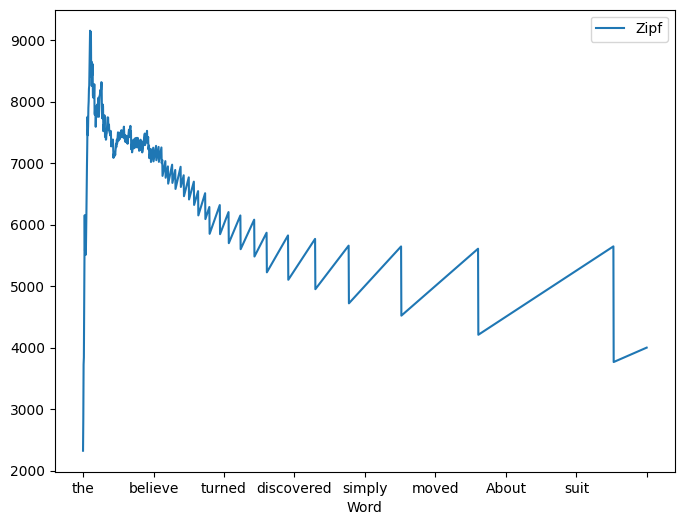

In [104]:
df_zipf.plot(x="Word", y="Zipf", figsize=(8,6))
display()